In [488]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


<b><h3>Statistical Experiments and Significance Testing</h3></b>

Design of experiments is a cornerstone of the practice of statistics, with applications in virtually all areas of research. The goal is to design an experiment in order to confirm or reject a hypothesis. Data scientists often need to conduct continual experiments, particularly regarding user interface and product marketing. 

Whenever you see references to statistical significance, t-tests, or p-values, it is typically in the context of the classical statistical inference "pipeline". This process starts with a hypothesis:"drug A is better than the existing standard drug" or "price A is more profitable than the existing price B". An experiment (it might be an A/B test) is designed to test the hypothesis - designed in such a way that it hopefully will deliver conclusive results. The data is collected and analyzed, and then a conclusion is drawn. The term inference reflects the intention to apply the experiment results, which involve a limited set of data, to a larger process or population.

1. Formulate hypothesis
2. Design experiment
3. Collect data
4. Inference / Conclusions

<b><h3>A/B Testing</h3></b>

An A/B test is an experiment with two groups to establish which of two treatments, products, procedures, or the like is superior. Often one of the two treatments is the standard existing treatment, or no treatment. If a standard (or no) treatment is used, it is called the control. A typical hypothesis is that a new treatment is better than the control.

A/B tests are common in web design and marketing, since results are so readily measured. Some examples of A/B testing include:
- Test two soil treatments to determine which produces better seed germination.
- Testing two therapies to determine which suppresses cancer more effectively.
- Testing two prices to determine which yields more net profit.
- Testing two web headlines to determine which produces more clicks.
- Testing two web ads to determine which generates more conversions.

A proper A/B test has subjects that can be assigned to one treatment or another. The subject might be a patient, a plant seed, a web visitor, a customer; the key is that the subject is exposed to the treatment. Ideally, subjects are assigned randomly to treatments (randomized). In this way, you know that any difference between the treatment groups is due to one of two things:
- The effect of the different treatment
- Luck of the draw in which subjects are assigned to which treatments (ie the random assignment may have resulted in the naturally better-performing subjects being concentrated in A or B).

You also need to pay attention to the test statistic or metric you use to compare group A to group B. Perhaps the most common metric in data science is a binary variable: click or no-click, buy or don't buy, fraud or no fraud, and so on. Those results would be summed up in a 2x2 table. We would have Conversion, No Conversion as the index, and Price A, Price B as the columns.

If the metric is a continuous variable (purchase amount, profit, etc.) or a count (eg days in hospital, pages visited), the result might be displayed differently. If one were interested not in conversion but in revenue per page view, the results of the price test might have mean and standard deviation/ mean absolute deviation on the index and Price A, Price B on the columns.

<b><h4>Why Have a Control Group?</h4></b>

Why not skip the control group and just run an experiment applying the treatment of interest to only one group, and compare the outcome to prior experience?. Without a control group, there is no assurance that "all other things are equal" and that any difference is really due to the treatment (or to chance). When you have a control group, it is subject to the same conditions, except for the treatment of interest, as the treatment group. If you simply make a comparison to "baseline" or prior experience, other factors, besides the treatment, might differ.

A/B testing in data science is typically in a web context. Treatments might be the design of a web page, the price of a product, the wording of a headline, or some other item. Some thought is required to preserve the principles of randomization. Typically the subject in the experiment is the web visitor, and the outcomes we are interested in measuring are clicks, purchases, visit duration, number of pages visited, whether a particular page is visited, and the like. In a standard A/B experiment, you need to decide on one metric ahead of time. Multiple behavior metrics might be collected and be of interest, but if the experiment is expected to lead to a decision between treatment A and treatment B, a single metric or test statistic, needs to be established beforehand. Selecting a test statistic after the experiment is conducted opens the door to researcher bias.

<b><h4>Blinding in studies</h4></b>

A blind study is one in which the subjects are unaware of whether they are getting treatment A or treatment B. Awareness of receiving a particular treatment can affect response. A double-blind study is one in which the investigators and facilitators are also unaware which subjects are getting which treatment. Blinding is not possible when the nature of the treatment is transparent eg cognitive therapy from a computer versus a psychologist.

<b><h4>Why Just A/B? Why Not C,D,...?</h4></b>

A/B tests are popular in the marketing and ecommerce worlds, but are far from the only type of statistical experiment. Additional treatments can be included. Subjects might have repeated measurements taken. Pharmaceutical trials where subjects are scarce, expensive, and acquried over time are sometimes designed with multiple opportunities to stop the experiment and reach a conclusion. Traditional statistical experimental designs focus on answering a static question about the efficacy of specified treatments. Data scientists are less interested in the question : Is the difference between price A and price B statistically significant? than the question: Which, out of multiple possible prices, is best? For this, a relatively new type of experimental design is used: the multi-arm bandit.

<b><h3>Hypothesis Tests</h3></b>

Hypothesis tests, also called significance tests, are ubiquitous in the traditional statistical analysis. Their purpose is to help you learn whether random chance might be responsible for an observed effect. An A/B test is typically constructed with a hypothesis in mind. For example, the hypothesis might be that price B produces higher profit. Why do we need a hypothesis? Why not just look at the outcome of the experiment and go with whichever treatment does better? The answer lies in the tendency of the human mind to underestimate the scope of natural random behavior. One manifestation is the failure to anticipate extreme events. Another manifestation is the tendency to misinterpret random events as having patterns of some significance. Statistical hypothesis testing was invented as a way to protect researchers from being fooled by random chance.

In a properly designed A/B test, you collect data on treatments A and B in such a way that any observed difference between A and B must be due to either:
- Random chance in assignment of subjects
- A true difference between A and B

A statistical hypothesis test is further analysis of an A/B test, or any randomized experiment, to assess whether random chance is a reasonable explanation for the observed difference between groups A and B.

<b><h4>The Null Hypothesis</h4></b>

Hypothesis tests use the following logic: "Given the human tendency to react to unusual but random behavior and interpret it as something meaningful and real, in our experiments we will require proof that the difference between groups is more extreme than what chance might reasonably produce." This involves a baseline assumption that the treatments are equivalent, and any difference between the groups is due to chance. This baseline assumption is termed the null hypothesis. Our hope, the, is that we can in fact prove the null hypothesis wrong and show that the outcomes for groups A and B are more different than what chance might produce.

One way to do this is via a resampling permutation procedure, in which we shuffle together the results from groups A and B and then repeatedly deal out the data in groups of similar sizes, and then observe how often we get a difference as extreme as the observed difference. The combined shuffled results from groups A and B, and the procedure of resampling from them, embodies the null hypthesis of groups A and B being equivalent and interchangeable and is termed the null model.

<b><h4>Alternative Hypothesis</h4></b>

Hypothesis tests by their nature involve not just a null hypothesis but also an offsetting alternative hypothesis. 

- Null = "no difference between the means of group A and group B"; Alternative = "A is different from B" (could be bigger or smaller)
- Null = "A $\leq$ B" ; Alternative = "A $\geq$ B"
- Null = "B is not X% greater than A"; Alternative = "B is X% greater than A"

Taken together, the null and alternative hypothesis must account for all possbilities. The nature of the null hypothesis determines the structure of the hypothesis test.

<b><h4>One-Way Versus Two-Way Hypothesis Tests</h4></b>

Often in an A/B test, you are testing a new option (say, B) against an established default option (A), and the presumption is that you will stick with the default option unless the new option proves itself definitively better. In such a case, you want a hypothesis test to protect you from being fooled by chance in the other direction, because you would be sticking with A unless B proves definitively better. So you want a directional alternative hypothesis (B is better than A). In such a case, you use a one-way (or one-tail) hypothesis test. This means that extreme chance results in only one direction count toward the p-value.

If you want a hypothesis test to protect you from being fooled by chance in either direction, the alternative hypothesis is bidirectional ( A is different from B; could be bigger or smaller). In such a case, you use a two-way (two-tail) hypothesis. This means that extreme chance results in either direction count toward the p-value.

A one-tail hypothesis test often fits the nature of A/B decision making, in which a decision is required and one option is typically assigned 'defau't' status unless the other proves better. Software, including Python, typically provides a two-tail test in its default output, and many statisticians opt for the more conservative two-tail test just to avoid argument. One-tail versus two-tail is a confusing subject, and not that relevant for data science, where the precision of of p-value calculations are not terribly important.

<b><h3>Resampling</h3></b>

Resampling in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. It can also be used to assess and improve the accuracy of some machine-learning models.

There are two main types of resampling procedures: the bootstrap and permutation tests. The bootstrap is used to assess the reliability of an estimate. Permutation tests are used to test hypotheses, typically involving two or more groups.

<b><h4>Permutation Test</h4></b>

In a permutation procedure, two or more samples are involved, typically the groups in an A/B or other hypothesis test. Permute means to change the order of a set of values. The first step in a permutation test of a hypothesis is to combine the results from groups A and B (and, if used, C,D,...). This is a logical embodiment of the null hypothesis and that the treatments to which the groups were exposed do not differ. We then test that hypothesis by randomly drawing groups from this combined set and seeing how much they differ from one another. The permutation procedure is as follows:
1. Combine the results from the different groups into a single data set.
2. Shuffle the combined data and then randomly draw (without replacement) a resample of the same size group as A (clearly it will contain some data from the other groups).
3. From the remaining data, randomly draw (without replacement) a resample of the same size as group B.
4. Do the same for groups C,D, and so on. You have now collected one set of resamples that mirror the sizes of the original samples.
5. Whatever statistic or estimate was calculated for the original samples (eg difference in group proportions), calculate it now for the resamples, and record; this constitutes one permutation iteration.
6. Repeat the previous steps R times to yield a permutation distribution of the test statistic.

Now go back to the observed difference between groups and compare it to the set of permuted differences. If the observed differences lies well within the set of permuted differences, then we have not proven anything - the observed difference is within the range of what chance might produce. However, if the observed difference lies outside most of the permutation distribution, then we conclude that chance is not responsible. In technical terms, the difference is statistically significant.

<b><h4>Example: Web Stickiness</h4></b>

A company selling a relatively high-value service wants to test which of two web presentations does a better selling job. Due to the high value of the service being sold, sales are infrequent and the sales cycle is lengthy; it would take too long to accumulate enough sales to know which presentation is superior. So the company decides to measure the results with a proxy variable, using the detailed interior page that describes the service. 

One potential proxy variable for our company is the number of clicks on the detailed landing page. A better one is how long people spend on the page. It is reasonable to think that a web presentation (page) that holds people's attention longer will lead to more sales. Hence, our metric is average session time, comparing page A to page B.

Due to the fact that this is an interior, special-purpose page, it does not receive a huge number of visitors. Also note that Google Analytics, which is how we measure session time, cannot measure session time for the last session a person visits. Instead of deleting that session from the data, though, Google Analytics records it as a zero, so the data requires additional processing to remove those sessions. The result is a total of 36 sessions for the two different presentations, 21 for page A and 15 for page B. 


(A proxy variable is one that stands in for the true variable of interest, which may be unavailable, too costly, or too time-consuming to measure. In climate research, for example, the oxygen content of ancient ice cores is used as a proxy for temperature. It is useful to have at least some data on the true variable of interest, so the strength of its association with the proxy can be assessed.)

In [489]:
session_times = pd.read_csv('../data/web_page_data.csv')
session_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [490]:
session_times.Time = 100 * session_times.Time # in seconds
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


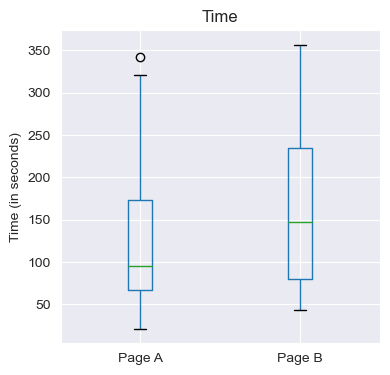

In [491]:
ax = session_times.boxplot(by='Page', column='Time', figsize=(4,4)) # boxplot Times of different pages
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')  # remove suptitle by replacing with empty string
plt.tight_layout()

In [492]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
mean_a - mean_b

-35.66666666666667

Page B has session times that are greater than those of Page A by 35.67 seconds, on average. The question is whether this difference is within the range of what random chance might produce ie is statistically significant. One way to answer this is to apply a permutation test - combine all the session times together and then repeatedly shuffle and divide them into groups of 21 (recall that $n_A$ = 21 for page A) and 15 ($n_B$ = 15 for page B). 

To apply the permutation test, we need a function to randomly assign the 36 session times to a group of 21 (page A) and a group of 15 (page B). 

In [493]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B   # set difference
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

This function works by sampling (without replacement) $n_B$ indices and assigning them to the B group; the remaining $n_A$ indices are assigned to group A. The difference between the two means is returned. Calling this function, R=1,000 times and specifying $n_A$ = 21 and $n_B$ = 15 leads to a distribution of differences in the session times that can be plotted as a histogram.

In [494]:
nA = session_times[session_times['Page'] == 'Page A'].shape[0]
nB = session_times[session_times['Page'] == 'Page B'].shape[0]

Text(0, 0.5, 'Frequency')

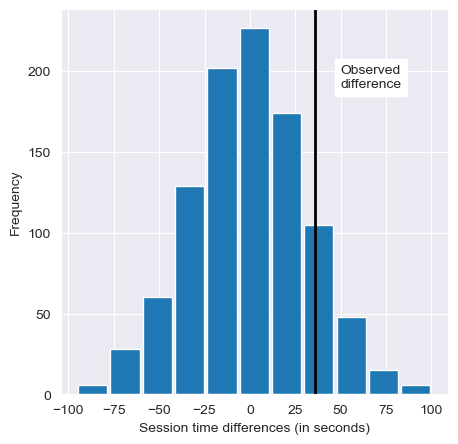

In [495]:
random.seed(1)

perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)] # randomly assign session times

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=mean_b - mean_a, color='black', lw=2)
ax.text(50,190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

The histogram above, shows that mean difference of random permutations often exceeds the observed difference in session times (the vertical line). For our results this happens in 12% of the cases. This suggests that the observed difference in session time between page A and page B is well within the range of chance variation and thus is not statistically significant.

In [496]:
perm_diffs = np.array(perm_diffs)
np.mean(perm_diffs > mean_b - mean_a)

0.121

<b><h4>Exhaustive and Bootstrap Permutation Tests</h4></b>

In addition to the preceding random shuffling procedure, also called random permutation test or a randomization test, there are two variants of the permutation test:
- An exhaustive permutation test
- A bootstrap permutation test

In an exhaustive permutation test, instead of just randomly shuffling and dividing the data, we actually figure out all the possible ways it could be divided. This is practical only for relatively small sample sizes. With a large number of repeated shufflings, the random permutation test results approximate those of the exhaustive permutation test, and approach them in the limit. Exhaustive permutation tests are also sometimes called exact tests, due to their statistical property of guaranteeing the null model will not test as 'significant' more than the alpha level of the test.

In a bootstrap permutation test, the draws outlined in the steps 2 and 3 of the random permutation test are made with replacement instead of without replacement. In this way, the resampling procedure models not just the random element in the assignment of treatment to subject but also the random element in the selection of subjects from a population. Both procedures are encountered in statistics, and the distinction between them is somewhat convoluted and not of consequence in the practice of data science.

<b><h4>Permutation Tests: The Bottom Line for Data Science</h4></b>

Permutation tests are useful heuristic procedures for exploring the role of random variation. They are relatively easy to code, interpret, and explain, and they offer a useful detour around the formalism and "false determinism" of formula-based statistics, in which the precision of formula "answers" tends to imply unwarranted certainty.

One virtue of resampling, in contrast to formula approaches, is that it comes much closer to a one-size-fits-all approach to inference. Data can be numeric or binary. Sample sizes can be the same or different. Assumptions about normally distributed data are not needed.

<b><h3>Statistical Significance and p-Values</h3></b>

Statistical significance is how statisticians measure whether an experiment (or even a study of existing data) yields a result more extreme that what chance might produce. If the result is beyond the realm of chance variation, it is said to be statistically significant.



In [497]:
prices = pd.DataFrame({'Price A':[200, 23539], 'Price B':[182, 22406]}, index=['Conversion', 'No Conversion'])
prices.columns.name= 'Outcome'
prices

Outcome,Price A,Price B
Conversion,200,182
No Conversion,23539,22406


In [498]:
price_A_conversion = prices.loc['Conversion', 'Price A'] / (prices['Price A'].sum())*100
price_A_conversion

0.8424954715868402

In [499]:
price_B_conversion = prices.loc['Conversion', 'Price B'] / (prices['Price B'].sum())*100
price_B_conversion

0.8057375597662475

Price A converts almost 5% better than price B - a difference of 0.0368 percentage points, big enough to be meaningful in a high-volume business. We can test whether the difference in conversions between prices A and B is within the range of chance variation, using a resampling procedure. By chance variation, we mean the random variation produced by a probability model that embodies the null hypothesis that there is no difference between rates. The following permutation procedure asks, "If the two prices share the same conversion rate, could chance variation produce a difference as big as 5%?"
1. Put cards labeled 1 and 0 in a box: this represents the supposed shared conversion rate of 382 ones and 45,945 zeros.
2. Shuffle and draw out a resample of size 23, 739 (same n as price A), and record how many 1s.
3. Record the number of 1s in the remaining 22,588 (same n as price B)
4. Record the difference in proportion of 1s.
5. Repeat steps 2-4.
6. How often was the difference >= 0.0368?

See the histogram of 1,000 resampled results below; as it happens, in this case the observed difference of 0.0368% is well within the range of chance variation.

In [500]:
obs_pct_diff = price_A_conversion - price_B_conversion
f"Observed difference: {obs_pct_diff: .4f}"

'Observed difference:  0.0368'

Text(0, 0.5, 'Frequency')

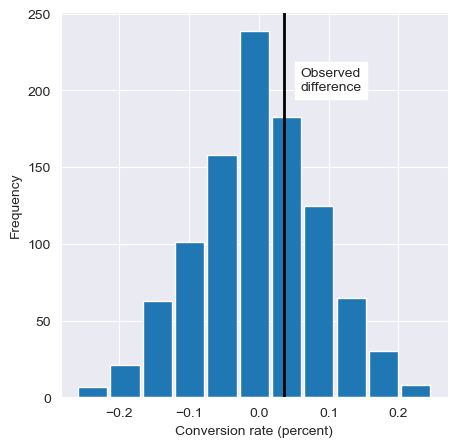

In [501]:
random.seed(1)
conversion = [0]*45945
conversion .extend([1]*382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)] # random difference in conversion rate

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

<b><h4>p-Value</h4></b>

Simply looking at the graph is not a very precise way to measure statistical significance, so of more interest is the p-value. This is the frequency with which the chance model produces a result more extreme than the observed result. We can estimate a p-value from our permutation test by taking the proportion of times that the permutation test produces a difference equal to or greater than the observed difference.

In [502]:
# If np.mean() is applied to a list of booleans if returns percentage of True ie # True / # Total
np.mean([diff > obs_pct_diff for diff in perm_diffs]) # True  = 1, False = 0

0.332

The p-value in the prices example is 0.332, which means that we would expect to achieve a result as extreme as this, or a more extreme result, by random chance over 30% of the time. In this case, we didnt need to use a permutation test to get a p-value. Since we have a binomial distribution, we can approximate the p-value. The method scipy.stats.ch2_contingency(). Note how the ndarray of values are entered. The normal approximatin yields a p-value of 0.3498, which is close to the p-value obtained from the permutation test.

In [503]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

In [504]:
print(f"p-value for single sided test: {p_value / 2 : .4f}") # returns two-tailed p-value,so divide by 1

p-value for single sided test:  0.3498


<b><h4>Alpha</h4></b>

Statisticians frown on the practice of leaving it to the researcher's discretion to determine whether a result is "too unusual" to happen by chance. Rather, a threshold is specified in advance, as in "more extreme than 5% of the chance (null hypothesis) results"; this threshold is known as alpha. Typical alpha levels are 5% and 1%. Any chosen level is an arbitrary decision - there is nothing about the process that will guarantee correct decisions x% of the time. This is because the probability question being answered is not "What is the probability that this happened by chance?" but rather "Given a chance model, what is the probability of a result this extreme?" We then deduce backward about the appropriateness of the chance model, but that judgement does not carry a probability. 

<b><h4>p-value controversy</h4></b>

Considerable controversy has surrounded the use of the p-value. The real problem is that people want more meaning from the p-value than it contains. We would like the p-value to tell us the probability that the result is due to chance. We hope for a low value, so we can conclude that we've proved something. But this is what the p-value actually represents:
The probability that, given a chance model, results as extreme as the observed results could occur. The results are subtle but real. 
1. P-values can indicate how incompatible the data are with a specified statistical model.
2. P-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
3. Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold.
4. Proper inference requires full reporting and transparency.
5. A p-value, or statistical significance, does not measure the size of an effect or the importance of a result.
6. By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis.

<b><h4>Practical Significance</h4></b>

Even if a result is statistically significant, that does not mean it has practical significance. A small difference that has no practical meaning can be statistically significant if it arose from large enough samples. Large samples ensure that small non-meaningful effects can nonetheless be big enough to rule out chance as an explanation. Ruling out chance does not magically render important a result that is, in its essence, unimportant.

<b><h4>Type 1 and Type 2 Errors</h4></b>

In assessing statistical significance, two types of error are possible:
- A Type 1 error, in which you mistakenly conclude an effect is real, when it is really just due to chance.
- A Type 2 error, in which you mistakenly conclude that an effect is not real (ie due to chance), when it is actually real.

Actually, a Type 2 error is not so much an error as a judgement that the sample size is too small to detect the effect. When a p-value falls short of statistical significance (eg it exceeds 5%), what we are really saying is "effect not proven". It could be that a larger sample would yield a smaller p-value. The basic function of significance tests (also called hypothesis tests) is to protect against being fooled by random chance; thus they are typically structured to minimize Type 1 errors.

<b><h4>Data Science and p-Values</h4></b>

For a data scientist, a p-value is a useful metric in situations where you want to know whether a model result that appears interesting and useful is within the range of normal chance variability. As a decision tool in an experiment, a p-value should not be considered controlling, but merely another point of information bearing on a decision. For example, p-values are sometimes used as intermediate inputs in some statistical or machine learning models - a feature might be included in or excluded from a model depending on its p-value. 

<b><h3>t-Tests</h3></b>

There are numerous types of significance tests, depending on whether the data comprises count data or measured data, how many samples there are, and what's being measured. A very common one is the t-test, named after Studetnt's t-distribution.

All significance tests require that you specify a test statistic to measure the effect you are interested in and help you determine whether the observed effect lies within the range of normal chance variation. In a resampling test, the scale of the data does not matter. You create the reference (null hypothesis) distribution from the data itself and use the test statistic as is.

When statistical hypothesis testing was being developed, it was not feasible to randomly shuffle data thousands of times to do a resampling test. Statisticians found that a good approximation to the permutation (shuffled) distribution was the t-test. It is used for the very common two-sample comparison - A/B test - in which the data is numeric. But in order for the t-distribution to be used without regard to scale, a standardized form of the test statistic must be used.

In Python, the function scipy.stats.ttest_ind() can be used for the t-test. We can also use statsmodels.api.stats.ttest_ind().

In [505]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
f"p-value for single sided test: {res.pvalue / 2 : .4f}" # returns two-taile p-value so divide by 2

'p-value for single sided test:  0.1408'

The alternative hypothesis is that the session time mean for page A is less than that for page B. The p-value of 0.1408 obtained with t-test approximation is fairly close to the permutation test p-values of 0.121. In a resampling mode, we structure the solution to reflect the observed data and the hypothesis to be tested, not worrying about whether the data is numeric or binary, whether or not sample sizes are balanced, sample variances, or a variety of other factors. 

In [506]:
tstat, p_value, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time,
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller'
)
f"p-value : {p_value : .4f}"

'p-value :  0.1408'

<b><h3>Multiple Testing</h3></b>

If you look at data through enough different perspectives and ask enough questions, you will almost invariably find a statistically significant effect. For example, if you have 20 predictor variables and one outcome variable, all randomly generated, the odds are pretty good that at least one predictor will (falsely) turn out to be statistically significant if you do a series of 20 significance tests at the alpha=0.05 level. This is a Type 1 error. You can calculate this probability by first finding the probability that all will correctly test nonsignificant at the 0.05 level. The probability that one will correctly test nonsignficant, so the probability that all 20 will correctly test nonsignificant is $0.95^{20}$ = 0.36. The probability that at least one predictor will (falsely) test significant is the flip side of this probability, or 1 - (probability that all will be nonsignificant) = 0.64. This is known as alpha inflation. This issue is related to the problem of overfitting in data mining or "fitting the model to the noise". The more variables you add, or the more models you run, the greater the probability that something will emerge as "significant" just by chance.

In supervised learning tasks, a holdout set where models are assessed on data that the model has not seen before mitigates this risk. In statistical and machine learning tasks not involving a labeled holdout set, the risk of reaching conclusions based on statistical noise persists. In statistics, there are some procedures intended to deal with this problem in very specific circumstances. For example, if comparing results across multiple treatment groups, you might ask multiple questins. So, for treatments A-C, you might ask:
- Is A different from B?
- Is B different from C?
- Is A differentfrom C?

Or, in a clinical trial, you might want to look at results from a therapy at multiple stages. In each case, you are asking multiple questions, and with each question, you are increasing the chance of being fooled by chance. Adjustment procedures in statistics can compensate for this by setting the bar for statistical significance more stringently than it would be set for a single hypothesis test. These adjustment procedures typically involve "dividing up the alpha" according to the number of tests. This results in a smaller alpha (ie, a more stringent bar for statistical significance) for each test. One such procedure, simply divides the alpha by the number of comparisons. Another, used in comparing multiple group means, applies to the maximum difference among group means, comparing it to a benchmark based on the t-distribution (roughly equivalent to shuffling all the values together, dealing out resampled groups of the same size as the original groups, and finding the maximum difference among the resampled group means).

However, the problem of multiple comparisons goes beyond these highly structured cases and is related to the phenomenon of repeated data "dredging". Given sufficiently complex data, there is lots of opportunities to find something interesting, including multiplicity issues such as:
- Checking for multiple pairwise differences across groups.
- Looking at multiple subgroup results ("we found no significant treatment effect overall, but we did find an effect for unmarried women younger than 30").
- Trying lots of statistical models.
- Including lots of variables in models.
- Asking a number of different questions (ie different possible outcomes).

The bottom line for data scientists on multiplicity is:
- For predictive modeling, the risk of getting an illusory model whose apparent efficacy is largely a product of random choice is mitigated by cross-validation and use of a holdout sample.
- For other procedures without a labeled holdout set to check the model, you must rely on:
    - Awareness that the more you query and manipulate the data, the greater the role that chance might play.
    - Resamploing and simulation hueristics to provide random chance benchmarks against which observed results can be compared.

<b><h4>False Discovery Rate</h4></b>

The term false discovery rate was originally used to describe the rate at which a given set of hypothesis tests would falsely identify a significant effect. The term can be used for classification in data mining; it is the misclassification rate within the class 1 predictions. Or put another way, it is the probability that a "discovery" (labeling a record as "1") is false.

<b><h3>Degrees of Freedom</h3></b>

Degrees of freedom is a concept applied to statistics calculated from sample data, and refers to the number of values free to vary. For example, if you know the mean of a sample of 10 values, there are 9 degrees of freedom (once you know the 9 of the sample values, the 10th can be calculated and is not free to vary). The degrees of freedom parameter, as applied to many probability distributions, affects the shape of the distribution.

The number of degrees of freedom is an input to many statistical tests. For example, degrees of freedom is the name given to the n-1 denominator seen in the calculation for variance and standard deviation. When you use a sample to estimate the variance for a population, you will nd up with an estimate that is slightly biased downward if you use n in the denominator. If you use n-1 in the denominator, the estimate will be free of that bias. When sample statistics are standardized for use in traditional statistical formulas, degrees of freedom is part of the standardization calculation that your standardized data matches the appropriate reference distribution (t-distribution, F-distribution, etc).

In data science, this is not super important since the data size is usually large enough that it rarely makes a real difference if for example the denominator is n or n - 1. (As n gets large, the bias that would come from using n in the denominator disappears.)

There is one context, though in which it is relevant: the use of factored variables in regression (including logistic regression). Some regression algorithms choke if exactly redundant predictor variables are present. This most commonly occurs when factoring categorical variables into binary indicators (dummies). Consider the variable "day of week". Although there are seven days of the week, there are only six degrees of freedom in specifying day of week. Inclusion of the Mon-Sat indicators thus means that also including Sunday would cause the regression to fail, due to multicollinearity error.


<b><h3>ANOVA</h3></b>

Suppose that, instead of an A/B test, we had a comparison of multiple groups, say A/B/C/D, each with numeric data. The statistical procedure that tests for a statistically significant difference among the groups is called analysis of variance, or ANOVA.

In [507]:
four_sessions = pd.read_csv('../data/four_sessions.csv')
four_sessions.shape

(20, 2)

In [508]:
four_sessions.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


In [509]:
four_sessions.Page.unique()

array(['Page 1', 'Page 2', 'Page 3', 'Page 4'], dtype=object)

In [510]:
four_sessions.groupby(by='Page').size()

Page
Page 1    5
Page 2    5
Page 3    5
Page 4    5
dtype: int64

The data frame above shows the stickiness of four web pages, defined as the number of seconds a visitor spent on the page. The four pages are switched out so that each web visitor receives one at random. There are a total of five visitors for each page, and the visitiors are independent ie the first viewer of page 1 has no connection to the first viewer for page 2. Note that in a web test like this, we cannot fully implement the classic randomized sampling design in which each visitor is selected at random from some huge population. We must take the visitors as they come. Visitors may systematically differ depending on time of day, time of week, season of the year, conditions of their internet, what device they are using, and so on. These factors should be considered as potential bias when the experiment results are reviewed.

Now we have a conundrum. When we were comparing just two groups, it was a simple matter; we merely looked at the difference between the means of each group. With four means, thee are six possible comparisons between groups:
- Page 1 compared to Page 2
- Page 1 compared to Page 3
- Page 1 compared to Page 4
- Page 2 compared to Page 3
- Page 2 compared to Page 4
- Page 3 compared to Page 4

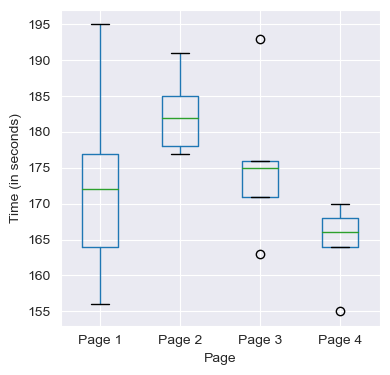

In [511]:
ax = four_sessions.boxplot(by='Page', column='Time', figsize=(4,4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')
plt.tight_layout()

The more such pairwise comparisons we make, the greater the potential for being fooled by random chance. Instead of worrying about all the different comparisons between individual pages we could possibly make, we can do a single overall test that addresses the question, "Could all the pages have the same underlying stickiness, and the differences among them be due to the random way in which a common set of session times got allocated among the four pages?

The procedure used to test this is ANOVA. The basis for it can be seen in the following resampling procedure:
1. Combine all the data together in a single box.
2. Shuffle and draw out four samples of five values each.
3. Record the mean of each of the four groups.
4. Record the variance among the four groups means.
5. Repeat steps 2-4 many (say, 1,000) times.

What proportion of the time did the resampled variance exceed the observed variance? This is the p-value.
Note here that we are using the variance among the group means to quantify how much the response rate among the four pages might differ ie using a measure of variability instead of the difference between measures of location.



In [512]:
observed_variance = four_sessions.groupby('Page').mean().var()[0] # variance among group means, Series val at 0 idx
print("Observed means: ", four_sessions.groupby('Page').mean().values.ravel())

Observed means:  [172.8 182.6 175.6 164.6]


In [513]:
print("Variance: ", observed_variance)

Variance:  55.426666666666655


In [514]:
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values) # randomly assingn the time values to pages
    return df.groupby('Page').mean().var()[0] # variance among randomly assigned page time mean values

In [515]:
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

Pr(Prob) 0.07633333333333334


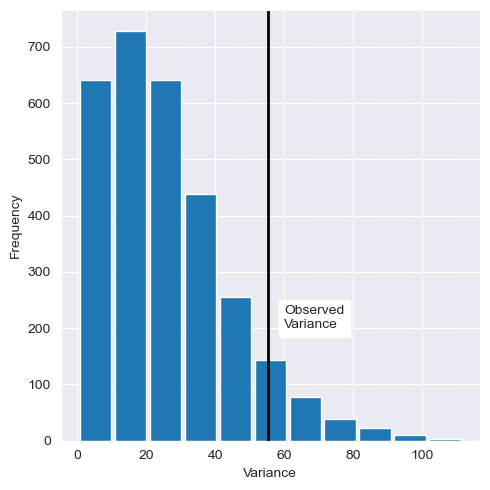

In [516]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x=observed_variance, color='black', lw=2)
ax.text(60,200, s='Observed\nVariance',bbox={'facecolor':'white'})
ax.set_xlabel("Variance")
ax.set_ylabel('Frequency')
plt.tight_layout()

The p-value of 0.078 means that given the same underlying stickiness, 7.8% of the time, the response rate among four pages might differ as much as was actually observed, just by chance. This degree of improbability falls short of the traditional statistical threshold of 5%, so we conclude that the difference among the four pages could have arisen by chance.

<b><h3>F-Statistic</h3></b>

Just like the t-test can be used instead of a permutation test for comparing the mean of two groups, there is a statistical test for ANOVA based on the F-statistic. The F-statistic is based on the ratio of the variance across group means (ie the treatment effect) to the variance due to residual error. The higher this ratio, the more statistically significant the result. If the data follows a normal distribution, then statistical theory dictates that the statistic should have a certain distribution. Based on this, it is possible to compute a p-value. 

The statsmodels package provides an ANOVA implementation in Python. We can also use the scipy.stats.f_oneway() function.

In [517]:
res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time,
four_sessions[four_sessions.Page == 'Page 2'].Time,
four_sessions[four_sessions.Page == 'Page 3'].Time,
four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f"F-Statistic : {res.statistic / 2 : .4f}")
print(f"p-value : {res.pvalue / 2 : .4f}")

F-Statistic :  1.3699
p-value :  0.0388


In [518]:
model = smf.ols('Time ~ Page', data=four_sessions).fit() # formula = 'Time ~ Page'
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


df is the "degrees of freedom", sum_sq is "sum of squares", mean_sq is "mean squares" ( short for mean-squared deviation), and F value is the F-statistic. A grand average is the mean of a group of averages. For the grand average sum of squares is the departure of the grand average from 0, squared, times 20 (the number of observations). The degrees of freedom for the grand average is 1, by definition.

For the treatment means, the degrees of freedom is 3 (once three values are set and then the grand average is set, the other treatment mean cannot vary). Sum of squares for the treatment means is the sum of squared departures between the treatment means and the grand average.

For the residuals, degrees of freedom is 20 (all observations can vary) and SS is the sum of squared difference between the individual observations and the treatment means. Mean squares (MS) is the sum of squares divided by the degrees of freedom.

The F-statistic is MS(treatment)/MS(error). The F value thus depends only on this ratio and can be compared to a standard F-distribution to determine whether the differences among treatment means are greater than would be expected in random chance variation.

<b><h4>Decomposition of Variance</h4></b>

Observed values in a data set can be considered sums of different components. For any observed data value within a data set, we can break it down into the grand average, the treatment effect, and the residual error. We call this the decomposition of variance.
1. Start with grand average (173.75 for web page stickiness data).
2. Add treatment effect, which might be negative.
3. Add residual error, which might be negative.

Thus the decomposition of the variane for the top-left value in the A/B/C/D test table is as follows:
1. Start with grand average: 173.75
2. Add treatment (group) effect: -1.75 ie (172 - 173.75) 
3. Add residual: -8 ie (164 - 172) 
4. Equals 164

In [519]:
decomposition = four_sessions.copy()

def add_treatement_means(group):
    group['treatment_mean'] = group.Time.mean()
    return group

decomposition = four_sessions.copy()
decomposition['grand_average'] = decomposition.groupby(by='Page').Time.mean().mean()
decomposition = decomposition.groupby(by='Page').apply(add_treatement_means)
decomposition['treatment_deviation'] = decomposition.treatment_mean - decomposition.grand_average 
decomposition['residual_error']  = decomposition.Time - decomposition.treatment_mean 
decomposition['recomposed_val']  = (decomposition.grand_average + decomposition.treatment_deviation + 
                                    decomposition.residual_error )
decomposition.head()

,Page,Time,grand_average,treatment_mean,treatment_deviation,residual_error,recomposed_val
0,Page 1,164,173.9,172.8,-1.1,-8.8,164.0
1,Page 2,178,173.9,182.6,8.7,-4.6,178.0
2,Page 3,175,173.9,175.6,1.7,-0.6,175.0
3,Page 4,155,173.9,164.6,-9.3,-9.6,155.0
4,Page 1,172,173.9,172.8,-1.1,-0.8,172.0


<b><h3>Two-Way ANOVA</h3></b>

The A/B/C/D test just described is a "one-way" ANOVA, in which we have one factor (group) that is varying. We could have a second factor involved - say, "weekend versus weekday" - with data collected on each combination (group A weekend, group A weekday, group B weekend, etc). This would be two-way ANOVA, and we would handle it in similar fashion to one-way ANOVA by identifying the "interaction effect". After identifying the grand average effect and the treatment effect, we then separate the weekend and weekday observations for each group and find the difference between the averages for those subsets and the treatment average.

<b><h3>Chi-Square Test</h3></b>

Web testing often goes beyond A/B testing and tests multiple treatments (categories) at once. The chi-square test is used with count data to test how well it fits some expected distribution. The most common use of the chi-square statistic in statistical practice is with r x c contingency tables, to assess whether the null hypothesis of independence among variables is reasonable.

<b><h4>Chi-Square Test: A Resampling Approach</h4></b>



In [520]:
click_rate = pd.read_csv('../data/click_rates.csv')
click_rate.head()

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12


In [521]:
clicks = click_rate.pivot_table( values='Rate', index='Click', columns='Headline')
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In the data frame above, the headlines certainly appear to differ. Headline A returns nearly twice the click rate of B. The actual numbers are small though. A resampling procedure can test whether the click rates differ to an extent greater than chance might cause. For this test, we need to have the 'expected' distribution of clicks, and in this case, that would be under the null hypothesis assumption that all three headlines share the same click rate, for an overall click rate of 34/3,000. Under this assumption, our contingency table will be as below.

The Pearson residual is defined as:

R = $\frac{Observed - Expected}{\sqrt Expected}$

R measures the extent to which the actual counts differ from these expected counts.

The chi-square statistic is defined as the sum of the squared pearson residuals:

$X$ = $\sum_i^r \sum_j^c R^2$ where r and c are the number of rows and columns, respectively. The chi-square statistic for the example below is 1.666.

In [522]:
# Expected if all three headlines have the same click rate (null hypothesis)
row_average = clicks.mean(axis=1)
expected = pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average
})
expected

,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [523]:
pearson_residuals = (clicks - expected )/ (expected**(0.5))
pearson_residuals

Headline,Headline A,Headline B,Headline C
Click,,,
Click,0.792118,-0.990148,0.198030
No-click,-0.084809,0.106012,-0.021202


In [524]:
chi_square = (pearson_residuals**2).sum().sum()
chi_square

1.6659394708658917

We can test with this resampling algorithm:
1. Constitute a box with 34 ones (clicks) and 2,966 zeros (no clicks).
2. Shuffle, take three separate samples of 1,000 and count the clicks in each.
3. Find the squared differences between the shuffled counts and the expected counts and sum them.
4. Repeat steps 2 and 3, say, 1,000 times.
5. How often does the resampled sum of squared deviations exceed the observed? That's the p-value.

In [525]:
box = [1]*34                # clicks        , step 1
box.extend([0]*2966)        # add no clicks , step 1
random.shuffle(box)         # shuffle       , step 2

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected): # rows = click, expect = 34/3; row=no_click, expect = 1000 - 34/3
        pearson_residuals.append([(observe - expect)**2/expect for observe in row]) # R or pearson residuals
    
    # return sum of squares
    return np.sum(pearson_residuals)            # sum across rows and columns

# observed data
expected_clicks = 34/3                          # expected click rate for one sample under null hypothesis
expected_noclicks = 1000 - expected_clicks      # expected no click rate for one 1000 count samples
expected = [34/3, 1000 -34/3]                   # expected click rate and no click rate for one 100 count sample
chi2observed = chi2(clicks.values, expected)    # clicks.values of dataframe from above, expected to be broadcast

def perm_fun(box):
    sample_clicks = [
        sum(random.sample(box, 1000)),          # three separate 1000 count random samples, sum for click rate
        sum(random.sample(box, 1000)),          # bootstrapping
        sum(random.sample(box, 1000))
        ]
    sample_noclicks = [1000 - n for n in sample_clicks] # number of no clicks
    return chi2([sample_clicks, sample_noclicks], expected)     # step 3

# resampled data
perm_chi2 = [perm_fun(box) for _ in range(2000)]    # step 3 , step 4, pearson residuals of random samples
resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)  # step 5
print(f"Observed chi2 : {chi2observed : .4f}")
print(f"Resampled p-value : {resampled_p_value: 4f}")

Observed chi2 :  1.6659
Resampled p-value :  0.482000


With a p-value of 0.48 shows that the chi-square statistic of 1.6659 could easily have been obtained through randomness.

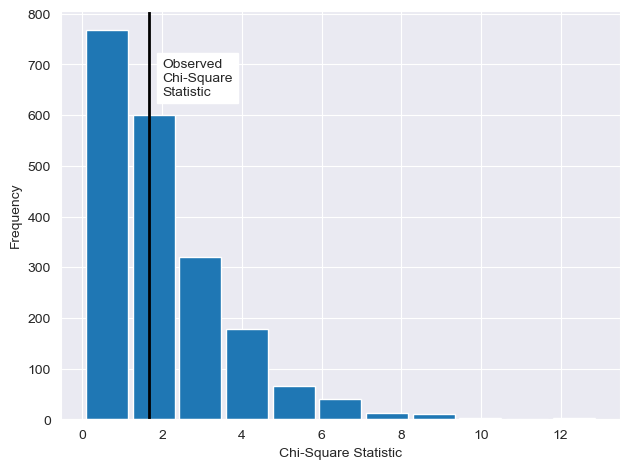

In [526]:
ax = pd.Series(perm_chi2).hist(bins=11, rwidth=0.9)
ax.axvline(x = chi2observed, color='black', lw=2)
ax.text(2, 640, 'Observed\nChi-Square\nStatistic', bbox={'facecolor':'white'})
ax.set_xlabel('Chi-Square Statistic')
ax.set_ylabel('Frequency')
plt.tight_layout()

<b><h3>Chi-Square Test: Statistical Theory</h3></b>

Asymptotic statistical theory shows that the distribution of the chi-square statistic can be approximated by a chi-square distribution. The appropriate standard chi-square distribution is determined by the degrees of freedom. For a contingency table, the degrees of freedom are related to the number of rows (r) and columns (c) as follows:

degrees of freedom = (r-1) x (c-1)

The chi-square distribution is typically skewed, with a long tail to the right. The further out the chi-square distribution, the observed statistic is, the lower the p-value.

In Python, to compute the p-value using the chi-square distribution as a reference, use the scipy.stats.chi2_contingency() function. For the previous example, the chi-square distribution p-value is a little less than the resampling p-value; this is because the chi-square distribution is only an approximation of the actual distribution of the statistic.

In [527]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f"Observed chi2: {chi2observed:.4f}")
print(f"p-value: {pvalue:.4f}")
print(f"Degree of Freedom : {df}" )

Observed chi2: 1.6659
p-value: 0.4348
Degree of Freedom : 2


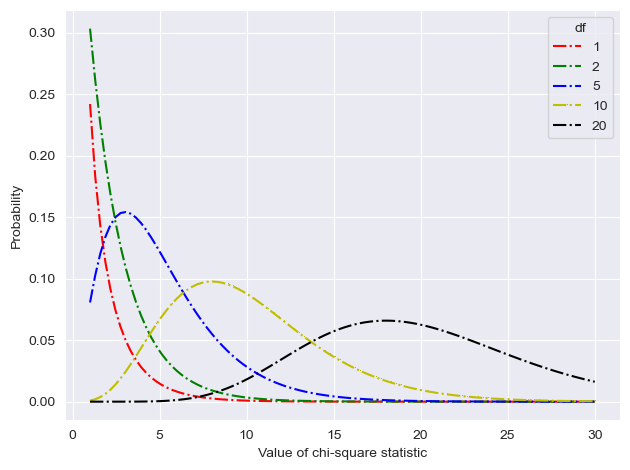

In [528]:

x = [ 1 + i*(30-1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x':x,
    'chi_1' : stats.chi2.pdf(x, df=1),  # degree of freedom = 1
    'chi_2' : stats.chi2.pdf(x, df=2),  # degree of freedom = 2
    'chi_5' : stats.chi2.pdf(x, df=5),  # degree of freedom = 5
    'chi_10': stats.chi2.pdf(x, df=10), # degree of freedom = 10
    'chi_20': stats.chi2.pdf(x, df=20)  # degree of freedom = 20

})

fig, ax = plt.subplots()
ax.plot(chi.x, chi.chi_1, 'r-.', label='1')
ax.plot(chi.x, chi.chi_2, 'g-.', label='2')
ax.plot(chi.x, chi.chi_5, 'b-.', label='5')
ax.plot(chi.x, chi.chi_10, 'y-.,', label='10')
ax.plot(chi.x, chi.chi_20, 'k-.', label='20')
ax.set_xlabel('Value of chi-square statistic')
ax.set_ylabel('Probability')
# sns.set_style('darkgrid')

ax.legend(title='df')

plt.tight_layout()

<b><h4>Fisher's Exact Test</h4></b>

The chi-square distribution is a good approximation of the shuffled resampling test, except when counts are extremely low (single digits, especially five or fewer). In such cases, the resampling procedure will yield more accurate p-values. In fact, most statistical software have a procedure to actually enumerate all the possible rearrangements (permutations) that can occur, tabulate their frequencies, and determine exactly how extreme the observed result is. This is called Fisher's exact test. In Python we would use stats.fisher_exact(), but the current implementation only supports a 2x2 contingency table.

Where some counts are very low but others are quite high (eg the denominator in a conversion rate), it may be necessary to do a shuffled permutation test instead of a full exact test, due to the difficulty of calculating all possible permutations. 

In [529]:
stats.fisher_exact(prices)

(1.0460078177483334, 0.6811282492334833)

<b><h4>Detecting Scientific Fraud</h4></b>

An interesting example is provided by the case of a Tufts University researcher who was accused of fabricating data in her research. One element in the case rested on statistical evidence regarding the expected distribution of digits in her laboratory data, where each observation had many digits. Investigators focused on the interior digits (ignoring the first digit and last digit of a number), which would be expected to follow a uniform random distribution. That is, they would occur randomly, with each digit having equal probability of occuring (the lead digit might be predominantly one value, and the final digits might be affected by rounding).

In [530]:
imanishi = pd.read_csv('../data/imanishi_data.csv')
imanishi.head()

,Digit,Frequency
0,0,14
1,1,71
2,2,7
3,3,65
4,4,23


In [531]:
imanishi.columns

Index(['Digit', 'Frequency  '], dtype='object')

In [532]:
imanishi.columns = [c.strip() for c in imanishi.columns]

In [533]:
imanishi.columns

Index(['Digit', 'Frequency'], dtype='object')

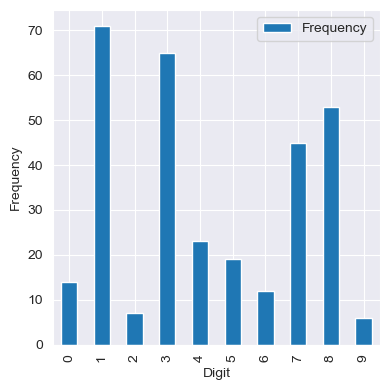

In [534]:
ax = imanishi.plot.bar(x='Digit', y='Frequency', figsize=(4,4))
ax.set_xlabel('Digit')
ax.set_ylabel('Frequency')
plt.tight_layout()

The distribution of the 315 digits, certainly looks nonrandom. Investigators calculated the departure from expectation (31.5 - that's how often each digit would occur in a strictly uniform distribution) and used a chi-square test (a resampling procedure could equally have been used) to show the actual distribution was well beyond the range of normal chance variation, indicating the data might have been fabricated. The researcher in question though was eventually fabricated after a lengthy investigation.

<b><h4>Relevance for Data Science</h4></b>

The chi-square test, or Fisher's exac test, is used when you want to know whether an effect is for real or might be the product of chance. In most classical statistical applications of the chi-square test, its role is to establish statistical significance, which is typically needed before a study or an experiment can be published. This is not so important for data scientists. In most data science experiments, whether A/B or A/B/C..., the goal is not simply to establish statistical significance but rather to arrive at the best treatment. For this purpose, multi-armed bandits offer a more complete solution.

One data science application of the chi-square test, especially Fisher's exact version, is in determining appropriate sample sizes for web experiments. These experiments often have very low click rates, and despite thousands of exposures, count rates might be too small to yield definitive conclusions in an experiment. In such cases, Fisher's exact test, the chi-square test, and other tests can be useful as a component of power and sample size calculations.

Chi-square tests are used widely in research by investigators in search of the elusive statistically significant p-value that will allow publication. Chi-square tests, or similar resampling simulations, are used in data science applications as a filter to determine whether an effect or a feature is worthy of further consideration than as a formal test of significance. For example, they are used in spatial statistics and mapping to determine whether spatial data conforms to a specified null distribution (e.g. are crimes concentrated in a certain area to a greater degree than random chance would allow?). They can also be used in automated feature selection in machine learning, to assess class prevalence across features and identify features where the prevalence of a certain class is unusually high or low, in a way that is not compatible with random variation.

<b><h3>Multi-Arm Bandit Algorithm</h3></b>

Multi-arm bandits offer an approach to testing, especially web testing, that allows explicit optimization and more rapid decision making than the traditional statistical approach to designing experiments. A traditional A/B test involves data collected in an experiment, according to a specified design, to answer a specific question such as "Which is better, treatment A or treatment B?". The presumption is that once we get an answer to that question, the experimenting is over and we proceed to act on the results.

There are several difficulties with that approach. First, our answer may be inconclusive: "effect not proven". In other words, the results from the experiment may suggest an effect, but if there is an effect, we don't have a big enough sample to prove it (to the satisifaction of the traditional statistical standards), so what decision to we take?. Second, we might want to begin taking advantage of results that come in prior to the conclusion of the experiment. Third, we might want the right to change our midns or try something different based on additional data that comes in after the experiment is over. The traditional approach to experiments and hypothesis tests are rather inflexible. Moreover, data science (and business in general) is not so worried about statistical significance, but concerned more with optimizing overall effort and results.

Bandit algorithms, which are very popular in web testing, allow you to test multiple treatments at once and reach conclusions faster than traditional statistical designs. The name and design is based on slot machines called one-armed bandits. If you imagine slot machines with more than one arm, each arm paying out at a different rate, you would have a multi-armed bandit. In this analogy, the goal is to win as much money as possible, and more specifically, to identify and settle on the winning arm sooner rather than later. The chanllenge is that you don't know at what overall rate the arms pay out - you only known the results of individual pulls on the arms. Suppose each "win" is for the same amount, no matter which arm. What differs is the probability of a win. Suppose further that you initially try each arm 50 times and get the following results:

Arm A : 10 wins out of 50
Arm B : 2 wins out of 50
Arm C : 4 wins out of 50

One extreme approach is to say, "Looks like arm A is a winner - let's quit trying the other arms and stick with A". This takes full advantage of the information from the initial trial. If A is truly superior, we get the benefit of that early on. On the other hand, if B or C is truly better, we lose any opportunity to discover that. Another extreme approach is to say, "This all looks to be within the realm of chance - let's keep pulling them all equally". This gives maximum opportunity for alternates to A to show themselves. However, in the process, we are deploying what seem to be inferior treatments. How long do we permit that? Bandit algorithms take a hybrid: we start pulling A more often, to take advantage of its apparent superiority, but we don't abandon B and C. We just pull them less often. If A continues to outperform, we continue to shift resources (pulls) away from B and C and pull A more often. If, on the other hand, C starts to do better, and A starts to do worse, we can shift pulls from A to C. If one of them turns out to be superior to A, and this was hidden in the initial trial due to chance, it now has an opportunitity to emerge with further testing.


<b><h4>Application to Web Offers: Epsilon Algorithm</h4></b>

Now think of applying this to web testing. Instead of multiple slot machine arms, you might have multiple offers, headlines, colors and so on being tested on a website. Customers either click (a "win" for the merchant) or don't click. Initially, the offers are shown randomly and equally. If, however, one offer starts to outperform the others, it can be shown ("pulled") more often. But what should the parameters of the algorithm that modifies the pull rates be? What "pull rates" should we change to, and when should we change?

Here is one simple algorithm, the epsilon-greedy algorithm for an A/B test:
1. Generate a uniformly distributed random number between 0 and 1.
2. If the number lies between 0 and epsilon (where epsilon is a number between 0 and 1, typically fairly small), flip a fair coin (50/50 probability) and:
    - If th coin is heads, show offer A.
    - If the coin is tails show offer B.
3. If the number is $\geq$ epsilon, show whichever offer has had the highest response rate to date.

Epsilon is the single parameter that governs this algorithm. If epsilon is 1, we end up with a standard simple A/B experiment (random allocation between A and B for each subject). If epsilon is 0, we end up with a purely greedy algorithm - one that chooses the best available option ( a local optimum). It seeks no further experimentation, simply assigning subjects (web visitors) to the best-performing treatment.

A more sophisticated algorithm uses "Thompson's sampling". This procedure "samples" (pulls a bandit arm) at each stage to maximize the probability of choosing the best arm. Of course you don't know which is the best arm- that's the whole problem!-but as you observe the payoff with each successive draw, you gain maore information. Thompson's sampling uses a Bayesian approach: some prior distribution of rewards is assumed initially, using what is called a beta distribution (this is a common mechanism for specifying prior information in a Bayesian problem). As information accumulates from each draw, this information can be updated, allowing the selection of the next draw to be better optimized as far as choosing the right arm.

Bandit algorithms can efficiently handle 3+ treatments and move toward optimal selection of the "best". For traditional statistical testing procedures, the complexity of decision making for 3+ treatments far outstrips that of the traditional A/B test, and the advantage of bandit algorithms is much greater.

<b><h3>Power and Sample Size</h3></b>

If you run a web test, how do you decide how long it should run (i.e., how many impressions per treatment are needed?).It depends on the frequency with which the desired goal is attained. One step in statistical calculations for sample size is to ask "Will a hypothesis test actually reveal a difference between treatments A and B? The outcome of a hypothesis test - the p-value - depends on what the real difference is between treatment A and treatment B. It also depends on the luck of the draw - who gets selected for the groups in the experiment. But it makes sense that the bigger the actual difference between treatments A and B, the greater the probability that our experiment will reveal it; and the smaller the difference, the more data will be needed to detect it. 

Power is the probability of detecting a specified effect size with specified sample characteristics (size and variability). For example, we might say (hypothetically) that the probability of distinguishing between a .330 hitter and a .200 hitter in 25 at-bats is 0.75. The effect size here is .130. And 'detecting' means that a hypothesis test will reject the null hypothesis of 'no difference' and conclude that there is a real effect. So the experiment at 25 at-bats (n=25) for two hitters, with an effect size of .130, has (hypothetical) power of 0.75, or 75%.

Data scientists may face occassions where they want to collect some data for an A/B test, and collecting or processing the data involves some cost. In that case, knowing approximately how much data to collect can help avoid the situation where you collect data at some effort, and the result ends up being inconclusive. Here's a fairly intuitive alternative approach:

1. Start with some hypothetical data that represents your best guess about the data that will result (perhaps based on prior data) - for example, a box with 20 ones and 80 zeros to represent a .200 hitter, or a box with some observations of time spent on website.

2. Create a second sample simply by adding the desired effect size to the first sample - for example, a second box with 33 ones and 67 zeros, or a second box with 25 seconds added to each initial "time spent on website".

3. Draw a bootstrap sample of size n from each box.

4. Conduct a permutation (or formula-based) hypothesis test on the two bootstrap samples and record whether the difference between them is statistically significant.
 
5. Repeat the preceding two steps many times and determine how often the difference was significant - that's the estimated power.

<b><h3>Sample Size</h3></b>

The most common use of power calculations is to estimate how big a sample you will need. For example, suppose you are looking at click-through rates (clicks as a percentage of exposures), and testing a new ad against an existing ad. How many clicks do you need to accumulate in the study? If you are interested only in results that show a huge difference, say a 50% difference, a relatively small smaple might do the trick. If on the other hand, even a minor difference would be of interest, then a much larger sample is needed. A standard approach is to establish a policy that a new ad must do better than an existing ad by some percentage, say, 10%; otherwise, the existing ad will remain in place. This goal, the "effect size", then drives the sample size.

For example, suppose current click-through rates are about 1.1% and you are seeking a 10% boost to 1.21%. So we have two boxes: box A with 1.1% ones (say, 110 ones and 9,890 zeros), and box B with 1.21% ones (say, 121 ones and 9,879 zeros). For starters, let's try 300 draws from each box (this would be like 300 impressions for each ad). Suppose our first draw yields the following:

Box A : 3 ones

Box B : 5 ones

Right away we can see that any hypothesis test would reveal this difference (5 versus 3) to be well within the range of chance variation. This combination of sample size (n=300 in each group) and effect size (10%) is too small for any hypothesis test to reliably show a difference.

So we can try increasing the sample size (let's try 2,000 impressions), and require a larger improvement (50% instead of 10%).

For example, suppose current click-through rates are still 1.1% but we are now seeking a 50% boost to 1.65%. So we have two boxes: box A still with 1.1% ones (say, 110 ones and 9,890 zeros), and box B with 1.65% ones (say 165 ones and 9868 zeros). Now we'll try 2000 draws from each box. Suppose our first draw yields:

Box A : 19 ones

Box B : 34 ones

A significance test on this difference (34-19) shows it still registers as "not significant". To calculate power, we need to repeat the previous procedure many times, or use statistical software to calculate power, but our initial draw suggests to us that even detecting 50% improvement will require several thousand ad impressions.

In summary, for calculating power or required sample size, there are four moving parts:
- Sample size
- Effect size you want to detect
- Significance level (alpha) at which the test will be conducted
- Power

Specify any three of the them, and the fourth can be calculated. Most commonly, you would want to calculate sample size, so you must specity the other three. In Python, you also have to specity the alternative hypothesis as "greater" or "larger" to get a one-sided test. The statsmodels package contains several methods for power calculatioin. Here, we use proportion_effectsize() to calculate the effect size and TTestIndPower() to solve for the sample size.

In [536]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
print(f'Sample Size : {result:.3f}')

Sample Size : 116602.393


In [537]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
print(f'Sample Size : {result:.3f}')

Sample Size : 5488.408
